In [8]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [2]:
# Load the dataset
df = pd.read_csv("/content/mcdonalds.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


Data Exploration

In [5]:
# Checking for missing values
df.isnull().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [9]:
# Label Encoding for binary and categorical columns
df_encoded = df.copy()
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
encoder = LabelEncoder()

for col in binary_columns + categorical_columns:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

# Scaling the dataset for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

print("Preprocessed Data Sample:")
print(pd.DataFrame(scaled_data, columns=df_encoded.columns).head())


Preprocessed Data Sample:
      yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0 -1.111479    0.318735 -0.321349   0.391375 -1.054476  0.332951  0.818605   
1  0.899702    0.318735 -0.321349   0.391375  0.948339  0.332951  0.818605   
2 -1.111479    0.318735  3.111884   0.391375  0.948339  0.332951 -1.221590   
3  0.899702    0.318735 -0.321349   0.391375  0.948339  0.332951  0.818605   
4 -1.111479    0.318735 -0.321349   0.391375  0.948339  0.332951  0.818605   

      tasty  expensive   healthy  disgusting      Like       Age  \
0 -1.345528   1.339489 -0.498279   -0.566488  0.395759  1.153258   
1  0.743203   1.339489 -0.498279   -0.566488 -1.055624  0.449839   
2  0.743203   1.339489  2.006908   -0.566488 -1.345901  1.223600   
3  0.743203  -0.746553 -0.498279    1.765261 -0.475071  1.715993   
4 -1.345528  -0.746553  2.006908   -0.566488 -1.055624  0.309156   

   VisitFrequency    Gender  
0       -1.502741 -0.918645  
1       -1.502741 -0.918645  
2     

Explained Variance Ratio: [0.19854195 0.11516839 0.10656029 0.07565746 0.07360728 0.06539403
 0.06440383 0.05830148 0.04886635 0.04558087]


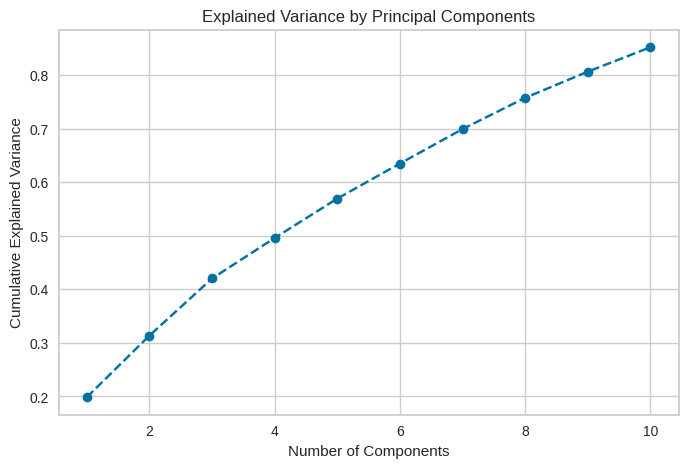

In [10]:
# Applying PCA
pca = PCA(n_components=10)
principal_components = pca.fit_transform(scaled_data)


explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Visualizing explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()


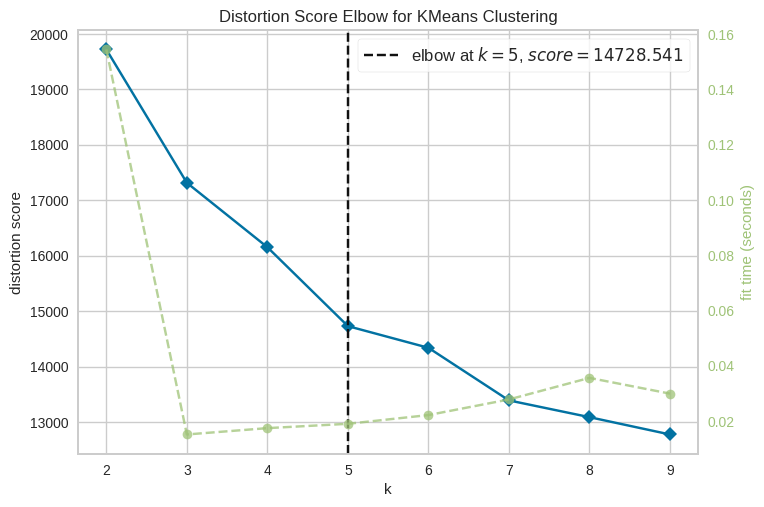

Cluster Centers:
 [[ 0.34692171  0.11662197  0.14043116 -2.55509245 -0.91392714  0.09881772
   0.1862643   0.34011447 -0.30738654  1.03999408 -0.51194453 -0.03710954
   0.39800857 -0.06694715  0.10256445]
 [ 0.69598369  0.27404377 -0.07717482  0.39137527 -0.16529504  0.21071216
   0.66471146  0.69818707 -0.73306601  0.06862779 -0.44588065 -0.33243489
  -0.28905344 -0.0037169  -0.17892082]
 [-1.07839994  0.28462858 -0.05030401  0.35260596  0.24998905  0.22320094
   0.48304707 -0.9676324  -0.54755589 -0.36642686  0.31558796  0.31937058
   0.41651959  0.12189641 -0.06690349]
 [-1.06703258 -1.76258426 -0.03682665  0.14719286  0.52785842 -0.86520282
  -0.83834858 -1.20704836  0.91306045 -0.41523394  1.48184417  0.88008821
   0.24775227  0.0740353   0.20139745]
 [ 0.41653584  0.25646246  0.10136165  0.36483052  0.18450269 -0.07783679
  -1.00715474  0.39194483  1.18287921 -0.06946298 -0.20937358 -0.28765497
  -0.31652789 -0.11196484  0.14824764]]


In [11]:
# Elbow Method to find clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(scaled_data)
visualizer.show()

optimal_clusters = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(scaled_data)

# Cluster Centers
print("Cluster Centers:\n", kmeans.cluster_centers_)


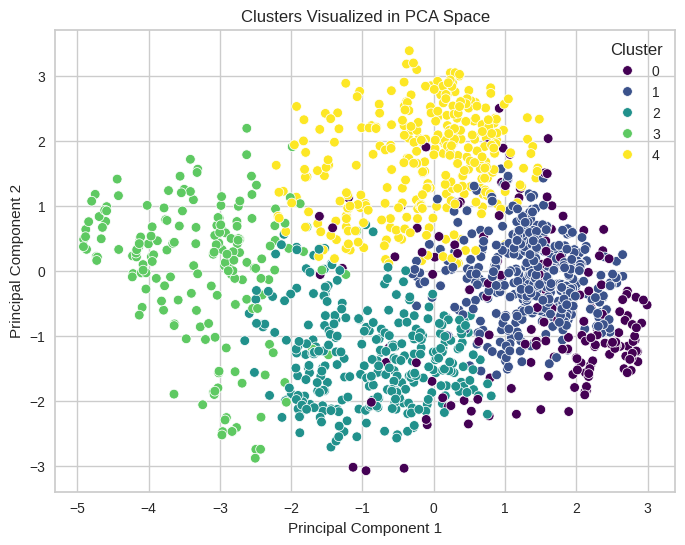

In [12]:
# Visualize clusters in the PCA-reduced space
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=principal_components[:, 0],
    y=principal_components[:, 1],
    hue=df_encoded['Cluster'],
    palette='viridis'
)
plt.title("Clusters Visualized in PCA Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Segment Analysis:
             yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.725146    0.941520  0.134503   0.000000  0.070175  0.929825   
1        0.898707    0.987069  0.071121   1.000000  0.443966  0.963362   
2        0.016447    0.990132  0.078947   0.986842  0.651316  0.967105   
3        0.022099    0.397790  0.082873   0.917127  0.790055  0.640884   
4        0.759760    0.981982  0.123123   0.990991  0.618619  0.876877   

            cheap     tasty  expensive   healthy  disgusting      Like  \
Cluster                                                                  
0        0.690058  0.807018   0.210526  0.614035    0.023392  4.508772   
1        0.924569  0.978448   0.006466  0.226293    0.051724  3.491379   
2        0.835526  0.180921   0.095395  0.052632    0.378289  5.736842   
3        0.187845  0.066298   0.795580  0.033149    0.878453  7.668508   
4        0.105105 

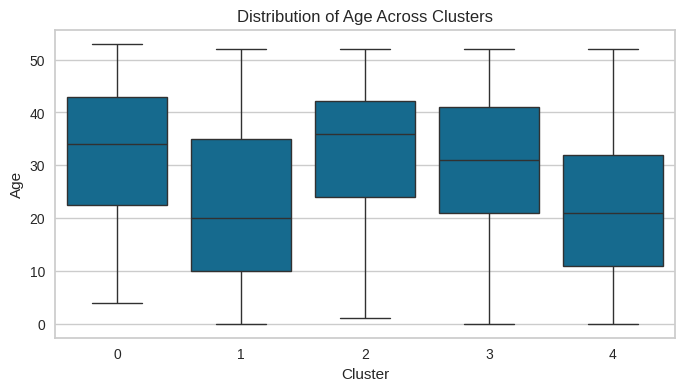

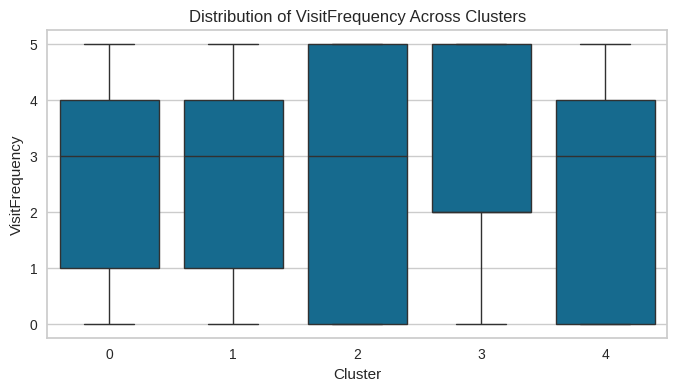

In [13]:
segments = df_encoded.groupby('Cluster').mean()
print("Segment Analysis:\n", segments)

#Boxplots for numeric features across clusters
numeric_features = ['Age', 'VisitFrequency']
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_encoded, x='Cluster', y=feature)
    plt.title(f"Distribution of {feature} Across Clusters")
    plt.show()


In [14]:
#Key metrics evaluation like 'Like' and 'VisitFrequency'
target_segment = segments.sort_values('Like', ascending=False).head(1)
print("Target Segment Characteristics:\n", target_segment)


Target Segment Characteristics:
             yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
3        0.022099     0.39779  0.082873   0.917127  0.790055  0.640884   

            cheap     tasty  expensive   healthy  disgusting      Like  \
Cluster                                                                  
3        0.187845  0.066298    0.79558  0.033149    0.878453  7.668508   

               Age  VisitFrequency    Gender  
Cluster                                       
3        30.127072        2.767956  0.558011  
